Multiple linear regression using sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set ()
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv("1.02.+Multiple+linear+regression.csv")

In [3]:
data.head(10)

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
5,1670,2.91,1
6,1764,3.00,2
7,1764,3.00,1
8,1792,3.01,2
9,1850,3.01,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT         84 non-null     int64  
 1   GPA         84 non-null     float64
 2   Rand 1,2,3  84 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.1 KB


In [5]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


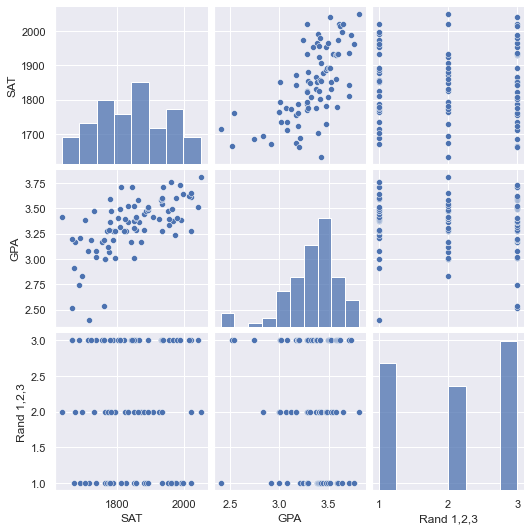

In [6]:
sns.pairplot(data)

In [7]:
y=data["GPA"]
x=data[["SAT","Rand 1,2,3"]]

In [8]:
reg= LinearRegression()
reg.fit(x,y)

LinearRegression()

In [9]:
reg.coef_


array([ 0.00165354, -0.00826982])

In [10]:
reg.intercept_

0.29603261264909486

<AxesSubplot:>

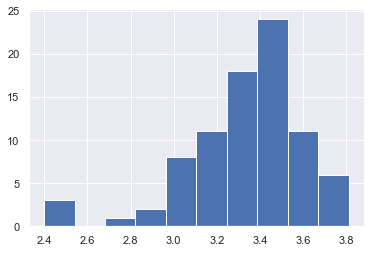

In [11]:
data["GPA"].hist()

In [12]:
reg.score(x,y)

0.40668119528142843

In [13]:
pwd

'C:\\Users\\DEV'

In [14]:
x.shape

(84, 2)

Adjusted r^2

In [15]:
r2=reg.score(x,y)
n= x. shape[0]
p= x.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.39203134825134023

In [16]:
from sklearn.feature_selection import f_regression

In [17]:
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [18]:
pvalues=f_regression(x,y)[1]
pvalues

array([7.19951844e-11, 6.76291372e-01])

In [19]:
pvalues.round(3)

array([0.   , 0.676])

In [20]:
reg_summary=pd.DataFrame(data=["SAT","Rand 1,2,3"],columns=["Features"])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [24]:
reg_summary ['Coefficients']=reg.coef_
reg_summary ['p-values']=pvalues.round(3)
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676
